# CSC 221 Web Scraping 
---


## Details:

- name: Nicholas Antonini
- Date: 4/23/2025
- Collaborator: Ethan Bevier

## Description:

The purpose of this code is to perform web scraping on a URL. The URL is for a wikipedia source detailing the US economy in from 1980 to 2029 (Future forcasts of the market).

The link to the URL: [Economy of the United States](https://en.wikipedia.org/wiki/Economy_of_the_United_States#:~:text=COVID%2D19%20pandemic,-Main%20article%3A%20Economic&text=Social%20distancing%20measures%20which%20took,the%20fourth%20quarter%20of%202008.)

# Internet Configurating Module Imports
----

* The code below starts necessary imports to start connection to URL for webscraping

In [107]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import urllib.request
from bs4 import BeautifulSoup
url = "https://en.wikipedia.org/wiki/Economy_of_the_United_States#:~:text=COVID%2D19%20pandemic,-Main%20article%3A%20Economic&text=Social%20distancing%20measures%20which%20took,the%20fourth%20quarter%20of%202008."
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")

### URL Status Verification

In [109]:
# Code serves to verify connection to URL. 
# Should be displayed as: "Economy of the United States - Wikipedia"
print(soup.title.string)

Economy of the United States - Wikipedia


# Searching for Sortable Data
---

* The code below will search the soup variable to find a table that the program needs.

Note: I did search for the correct class name using inspect on the webpage to find the right one as it was more efficient this way.

In [113]:
all_sortable_tables = soup.find_all('table', class_='wikitable sortable sticky-header')
print(len(all_sortable_tables))
right_table = all_sortable_tables[0]

# Code below commented out to minimize clutter. 
# Length method above is enough to verify single table needed. 
#
#for table in all_sortable_tables:
#    print(f"SORTABLE TABLE: {table}\n")

1




**Because the output above only contains one table, there is no need to sift through tables to make sure I'm pulling data from the right one.**

-------------------------------------------------------------------

# Organizing Data
---

* The code below organizes the data to prep for a DataFrame

In [117]:
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]
H=[]
I=[]

for row in right_table.find_all('tr'):
    cells = row.find_all('td')
    if len(cells)==9:
        A.append(cells[0].find(string=True).strip())
        B.append(cells[1].find(string=True).strip())
        C.append(cells[2].find(string=True).strip())
        D.append(cells[3].find(string=True).strip())
        E.append(cells[4].find(string=True).strip())
        F.append(cells[5].find(string=True).strip())
        G.append(cells[6].find(string=True).strip())
        H.append(cells[7].find(string=True).strip())
        I.append(cells[8].find(string=True).strip())

# DataFrame Labeling
---

* The code below creates the DataFrame and renames the columns for clarity and readability

In [120]:
import pandas as pd
df = pd.DataFrame(A, columns=['Year'])
df['GDP_PPP'] = B
df['GDP_per_capita_PPP'] = C
df['GDP_nominal'] = D
df['GDP_per_capita_nominal'] = E
df['GDP_growth'] = F
df['inflation_rate'] = G
df['unemployment'] = H
df['Government debt'] = I

### Verify df Creation
* The following code calls the dataframe and displayes it after the cell

In [122]:
df

,Year,GDP_PPP,GDP_per_capita_PPP,GDP_nominal,GDP_per_capita_nominal,GDP_growth,inflation_rate,unemployment,Government debt
0,1980,"2,857.3","12,552.9","2,857.3","12,552.9",−0.3%,13.5%,7.2%,n/a
1,1981,"3,207.0","13,948.7","3,207.0","13,948.7",2.5%,10.4%,7.6%,n/a
2,1982,"3,343.8","14,405.0","3,343.8","14,405.0",−1.8%,6.2%,9.7%,n/a
3,1983,"3,634.0","15,513.7","3,634.0","15,513.7",4.6%,3.2%,9.6%,n/a
4,1984,"4,037.7","17,086.4","4,037.7","17,086.4",7.2%,4.4%,7.5%,n/a
5,1985,"4,339.0","18,199.3","4,339.0","18,199.3",4.2%,3.5%,7.2%,n/a
6,1986,"4,579.6","19,034.8","4,579.6","19,034.8",3.5%,1.9%,7.0%,n/a
7,1987,"4,855.3","20,001.0","4,855.3","20,001.0",3.5%,3.6%,6.2%,n/a
8,1988,"5,236.4","21,376.0","5,236.4","21,376.0",4.2%,4.1%,5.5%,n/a
9,1989,"5,641.6","22,814.1","5,641.6","22,814.1",3.7%,4.8%,5.3%,n/a


# CSV File Creation
---

In [124]:
df.to_csv('CSC221-webscrape-data.csv') 
print('File CSC221-webscrape-data.csv created')

File CSC221-webscrape-data.csv created


# Plot/Graph

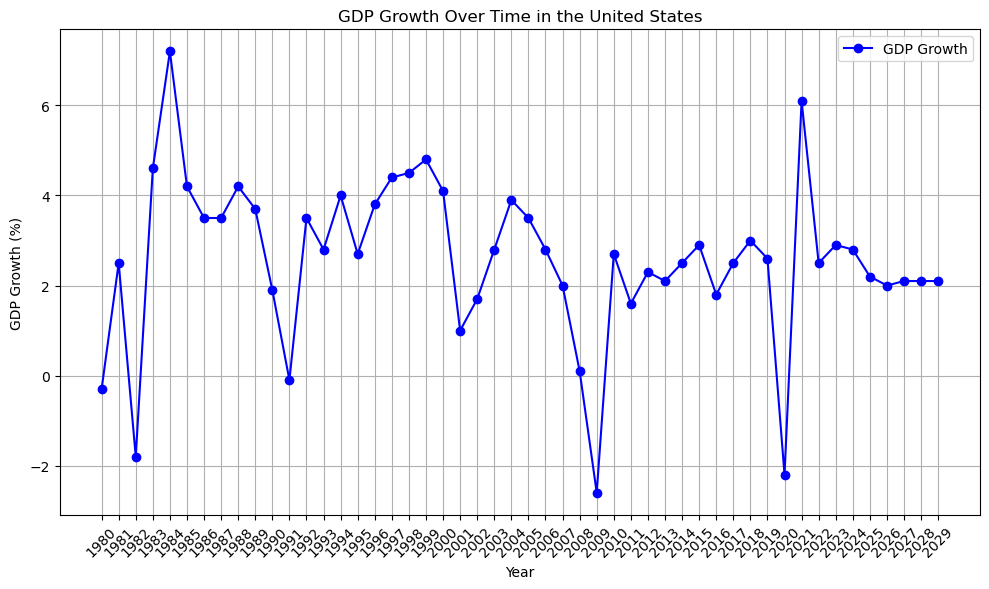

In [137]:
import matplotlib.pyplot as plt

df['GDP_growth'] = pd.to_numeric(df['GDP_growth'], errors='coerce')  

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['GDP_growth'], label='GDP Growth', color='blue', marker='o')

# Label the axes and give a title
plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.title('GDP Growth Over Time in the United States')

# Show grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


Line graph seemed to be the best way to display the data as it can show the change in data over each individual year, and line graphs seem to be the best when visualizing trends/patterns over years.